
#**_3-1-1-1_File Format and Reading Command 💾**


In [1]:
import scipy.io
import numpy as np # معمولاً داده‌های داخل فایل mat به صورت آرایه‌های NumPy خوانده می‌شوند

# نام فایل (مطمئن شوید فایل در مسیر درست قرار دارد یا مسیر کامل را بدهید)
file_path = '/content/sample_data/109.mat' # اگر فایل شما نام دیگری دارد، آن را جایگزین کنید

try:
    # خواندن فایل .mat
    mat_data = scipy.io.loadmat(file_path)
    print(f"فایل '{file_path}' با موفقیت خوانده شد.")

except FileNotFoundError:
    print(f"خطا: فایل در مسیر '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید.")
    mat_data = None # در صورت بروز خطا، متغیر را None قرار می‌دهیم
except Exception as e:
    print(f"خطایی هنگام خواندن فایل رخ داد: {e}")
    mat_data = None

# در اینجا mat_data متغیری است که داده‌های خوانده شده از فایل را در خود دارد.

فایل '/content/sample_data/109.mat' با موفقیت خوانده شد.


In [2]:
if mat_data is not None:
    print(f"نوع داده خوانده شده: {type(mat_data)}")

نوع داده خوانده شده: <class 'dict'>


In [3]:
if mat_data is not None:
    print("\nاجزای (کلیدهای) موجود در داده خوانده شده:")
    for key in mat_data.keys():
        print(f"- کلید: '{key}'")

    print("\nبررسی نوع و شکل داده برای هر کلید:")
    for key, value in mat_data.items():
        print(f"\nکلید: '{key}'")
        print(f"  نوع مقدار (Value Type): {type(value)}")
        # اگر مقدار یک آرایه نام‌پای باشد، می‌توانیم شکل (ابعاد) آن را نیز نمایش دهیم
        if isinstance(value, np.ndarray):
            print(f"  شکل آرایه (Shape): {value.shape}")
            # همچنین می‌توانید چند عنصر اول آن را برای نمونه ببینید
            # print(f"  نمونه داده: {value[:5]}") # نمایش ۵ عنصر اول اگر یک بعدی باشد یا برش مناسب دیگر
        # اگر کلیدهای استاندارد متال بودند، ممکن است مقادیر متفاوتی داشته باشند
        elif key in ['__header__', '__version__', '__globals__']:
             print(f"  مقدار: {value}")


    # برای دسترسی به داده‌های یک متغیر خاص، از نام آن به عنوان کلید استفاده می‌کنید.
    # برای مثال، دیتاست Case Western معمولا متغیرهایی با پیشوند 'X' و پسوند نشان‌دهنده نوع داده دارد
    # مانند 'X109_DE_time' یا 'X109_FE_time' (این نام‌ها مثالی هستند و به فایل دقیق شما بستگی دارد)
    # فرض کنیم یک کلید به نام 'X109_DE_time' در فایل شما وجود دارد:
    target_key = None
    # سعی می‌کنیم یک کلید داده واقعی پیدا کنیم (کلیدهایی که با '__' شروع نمی‌شوند)
    for key in mat_data.keys():
        if not key.startswith('__'):
            target_key = key
            break

    if target_key:
        print(f"\nدسترسی به داده‌های متغیر '{target_key}':")
        specific_data_array = mat_data[target_key]
        print(f"نوع داده این متغیر: {type(specific_data_array)}")
        if isinstance(specific_data_array, np.ndarray):
            print(f"شکل (ابعاد) آرایه: {specific_data_array.shape}")
            print(f"چند نمونه از داده‌های ابتدای آرایه:\n {specific_data_array[:5]}") # نمایش ۵ سطر اول یا ۵ عنصر اول
    else:
        print("\nهیچ کلید داده‌ای (به جز متادیتای فایل) یافت نشد تا به عنوان نمونه نمایش داده شود.")


اجزای (کلیدهای) موجود در داده خوانده شده:
- کلید: '__header__'
- کلید: '__version__'
- کلید: '__globals__'
- کلید: 'X109_DE_time'
- کلید: 'X109_FE_time'
- کلید: 'X109RPM'

بررسی نوع و شکل داده برای هر کلید:

کلید: '__header__'
  نوع مقدار (Value Type): <class 'bytes'>
  مقدار: b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 15:28:48 2000'

کلید: '__version__'
  نوع مقدار (Value Type): <class 'str'>
  مقدار: 1.0

کلید: '__globals__'
  نوع مقدار (Value Type): <class 'list'>
  مقدار: []

کلید: 'X109_DE_time'
  نوع مقدار (Value Type): <class 'numpy.ndarray'>
  شکل آرایه (Shape): (243938, 1)

کلید: 'X109_FE_time'
  نوع مقدار (Value Type): <class 'numpy.ndarray'>
  شکل آرایه (Shape): (243938, 1)

کلید: 'X109RPM'
  نوع مقدار (Value Type): <class 'numpy.ndarray'>
  شکل آرایه (Shape): (1, 1)

دسترسی به داده‌های متغیر 'X109_DE_time':
نوع داده این متغیر: <class 'numpy.ndarray'>
شکل (ابعاد) آرایه: (243938, 1)
چند نمونه از داده‌های ابتدای آرایه:
 [[ 0.010016  ]
 [-0.023788  ]
 [-0.0

#**_3-1-1-2_and_2-2 Loading and Inspecting .mat File Data 🔍**

In [5]:
import scipy.io
import numpy as np

# نام فایل (مطمئن شوید فایل در مسیر درست قرار دارد یا مسیر کامل را بدهید)
file_path = '/content/sample_data/109.mat' # اگر فایل شما نام دیگری دارد، آن را جایگزین کنید

try:
    mat_data = scipy.io.loadmat(file_path)
    print(f"فایل '{file_path}' با موفقیت خوانده شد.")
    print("\nکلیدهای موجود در فایل (نام‌های احتمالی سیگنال‌ها):")
    available_keys = [key for key in mat_data.keys() if not key.startswith('__')]
    if available_keys:
        for key in available_keys:
            print(f"- {key} (نوع داده: {type(mat_data[key])}, شکل: {mat_data[key].shape if isinstance(mat_data[key], np.ndarray) else 'N/A'})")
    else:
        print("هیچ کلید داده‌ای (سیگنال) در فایل یافت نشد.")
        mat_data = None # برای جلوگیری از خطاهای بعدی

except FileNotFoundError:
    print(f"خطا: فایل در مسیر '{file_path}' یافت نشد. لطفاً مسیر فایل را بررسی کنید.")
    mat_data = None
except Exception as e:
    print(f"خطایی هنگام خواندن فایل رخ داد: {e}")
    mat_data = None

فایل '/content/sample_data/109.mat' با موفقیت خوانده شد.

کلیدهای موجود در فایل (نام‌های احتمالی سیگنال‌ها):
- X109_DE_time (نوع داده: <class 'numpy.ndarray'>, شکل: (243938, 1))
- X109_FE_time (نوع داده: <class 'numpy.ndarray'>, شکل: (243938, 1))
- X109RPM (نوع داده: <class 'numpy.ndarray'>, شکل: (1, 1))


In [6]:
if mat_data is not None and available_keys:
    # نام کلیدی که می‌خواهید انتخاب کنید را در اینجا قرار دهید
    # این نام باید یکی از کلیدهایی باشد که در مرحله قبل مشاهده کردید.
    # به عنوان مثال، از اولین کلید موجود استفاده می‌کنیم:
    selected_signal_name = available_keys[0] # یا نام دقیق مورد نظرتان را بنویسید، مثلا 'X109_DE_time'

    if selected_signal_name in mat_data:
        # انتخاب سیگنال و ذخیره آن در متغیر جدید
        my_selected_signal = mat_data[selected_signal_name]

        # چاپ اطلاعاتی درباره سیگنال انتخاب شده
        print(f"\nسیگنال '{selected_signal_name}' انتخاب و در متغیر 'my_selected_signal' ذخیره شد.")
        print(f"نوع داده سیگنال انتخاب شده: {type(my_selected_signal)}")
        if isinstance(my_selected_signal, np.ndarray):
            print(f"شکل (ابعاد) سیگنال: {my_selected_signal.shape}")
            print(f"تعداد نمونه‌ها در سیگنال: {len(my_selected_signal)}") # اگر یک بعدی باشد
            print(f"چند نمونه اول سیگنال:\n{my_selected_signal[:5]}") # نمایش 5 نمونه اول
        else:
            print(f"محتوای سیگنال انتخاب شده: {my_selected_signal}")
    else:
        print(f"خطا: کلید '{selected_signal_name}' در داده‌های بارگذاری شده یافت نشد.")
else:
    if mat_data is not None:
        print("\nهیچ سیگنالی برای انتخاب وجود ندارد یا فایل به درستی بارگذاری نشده است.")


سیگنال 'X109_DE_time' انتخاب و در متغیر 'my_selected_signal' ذخیره شد.
نوع داده سیگنال انتخاب شده: <class 'numpy.ndarray'>
شکل (ابعاد) سیگنال: (243938, 1)
تعداد نمونه‌ها در سیگنال: 243938
چند نمونه اول سیگنال:
[[ 0.010016  ]
 [-0.023788  ]
 [-0.00792933]
 [ 0.078876  ]
 [ 0.202824  ]]


#**_3-1-2-1_Plotting the Signal Against Time (Fs = 48 kHz)📈**

Используется сигнал: X109_DE_time


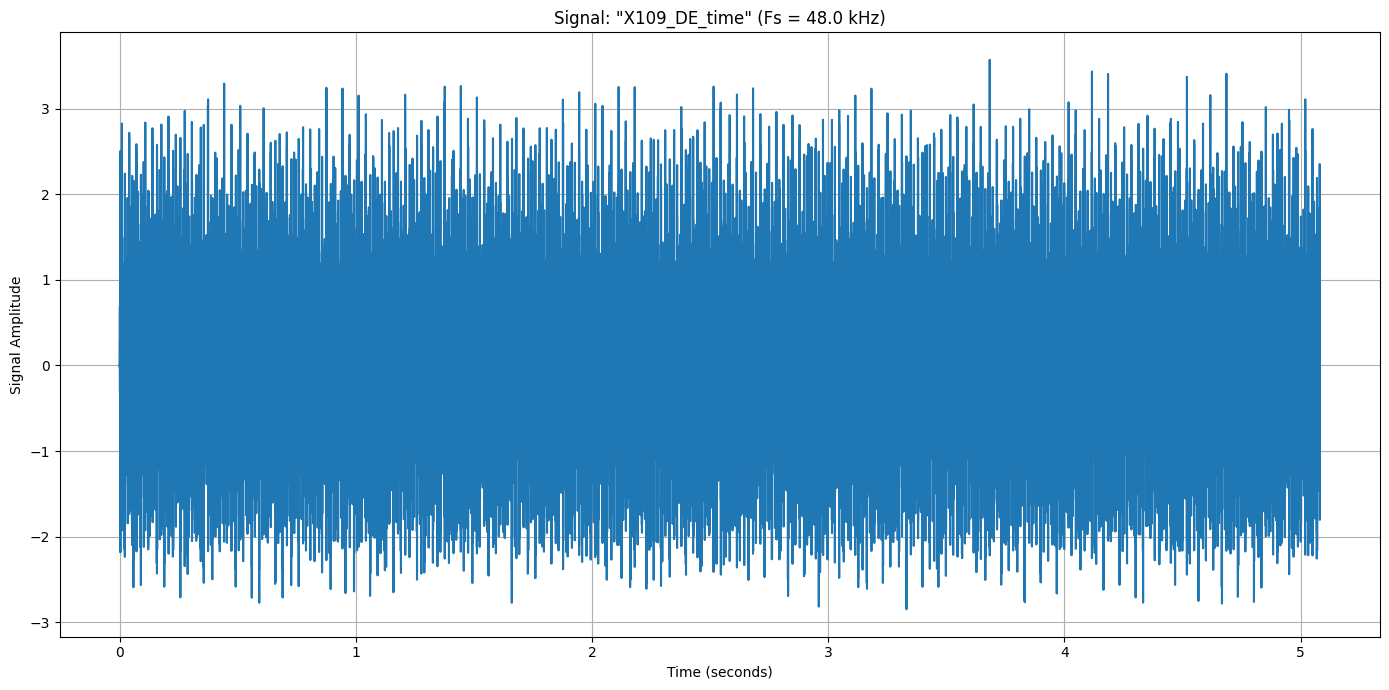

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Предполагается, что 'selected_vibration_signal' уже загружен.
# selected_vibration_signal = ... (например, mat_contents['X109_DE_time'])
# actual_signal_key = 'X109_DE_time' # Имя вашего сигнала для заголовка

# --- Убедитесь, что у вас есть эти переменные из предыдущих шагов ---
# Пример того, как они могли быть определены (адаптируйте под ваш код):
# import scipy.io
# file_path = '/content/sample_data/109.mat' # Или ваш путь к файлу
# mat_contents = scipy.io.loadmat(file_path)
# actual_signal_key = 'X109_DE_time' # Убедитесь, что это правильный ключ
# selected_vibration_signal = mat_contents[actual_signal_key]
# --- Конец примера определения переменных ---


# Проверка, существуют ли необходимые переменные
if 'selected_vibration_signal' not in locals() or 'actual_signal_key' not in locals():
    print("Ошибка: 'selected_vibration_signal' или 'actual_signal_key' не определены.")
    print("Пожалуйста, убедитесь, что вы загрузили данные и выбрали сигнал.")
    # Для примера, если они не определены, можно создать фиктивные данные:
    # print("Создание фиктивных данных для демонстрации...")
    # Fs_dummy = 48000
    # t_dummy = np.arange(0, 1, 1/Fs_dummy) # 1 секунда фиктивных данных
    # selected_vibration_signal = np.sin(2 * np.pi * 50 * t_dummy) + 0.5 * np.sin(2 * np.pi * 120 * t_dummy)
    # actual_signal_key = 'Dummy_Signal'
else:
    print(f"Используется сигнал: {actual_signal_key}")

# 1. Задайте частоту дискретизации
Fs = 48000.0  # Гц (48 кГц)

# 2. Создайте вектор времени
# Убедитесь, что selected_vibration_signal является 1D массивом
signal_data = selected_vibration_signal.flatten()
num_samples = len(signal_data)
total_duration_seconds = num_samples / Fs
time_vector = np.linspace(0, total_duration_seconds, num_samples, endpoint=False)

# 3. Отобразите сигнал
plt.figure(figsize=(14, 7)) # Размер графика можно настроить
plt.plot(time_vector, signal_data)

# Добавьте английские метки и заголовок
title_str = f'Signal: "{actual_signal_key}" (Fs = {Fs/1000} kHz)'
xlabel_str = 'Time (seconds)'
ylabel_str = 'Signal Amplitude'

plt.title(title_str)
plt.xlabel(xlabel_str)
plt.ylabel(ylabel_str)
plt.grid(True) # Добавить сетку для лучшей читаемости
plt.tight_layout() # Улучшить расположение элементов
plt.show()

#**_3-1-2-2_Displaying a Specific Time Segment of the Signal (2s - 2.01s) 🔍**

فایل '/content/sample_data/109.mat' با موفقیت خوانده شد.
کلید سیگنال انتخاب شده: 'X109_DE_time'
سیگنال 'X109_DE_time' با موفقیت در 'selected_vibration_signal' ذخیره شد.
فرکانس نمونه‌برداری به صورت دستی تنظیم شد: 12000.0 هرتز


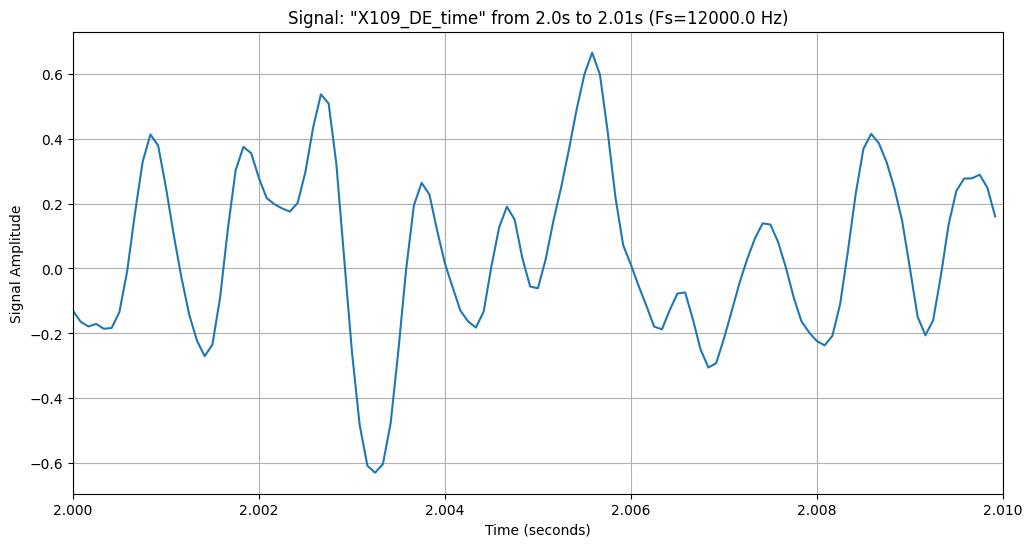

In [12]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# --- بخش ۱: بارگذاری فایل و انتخاب سیگنال ---
file_path = '/content/sample_data/109.mat'  # مسیر فایل شما
mat_contents = None
selected_vibration_signal = None
actual_signal_key = None
sampling_frequency_key = None # این متغیر دیگر استفاده مستقیم برای پیدا کردن ندارد، چون دستی وارد می کنیم

try:
    mat_contents = scipy.io.loadmat(file_path)
    print(f"فایل '{file_path}' با موفقیت خوانده شد.")

    possible_signal_keys = [k for k in mat_contents.keys() if k.startswith('X') and not k.startswith('__')]
    if possible_signal_keys:
        # شما اینجا 'X109_DE_time' را دارید که صحیح است
        actual_signal_key = 'X109_DE_time'
        print(f"کلید سیگنال انتخاب شده: '{actual_signal_key}'")
    else:
        print("خطا: هیچ کلید سیگنال داده‌ای (مثلا با شروع 'X') در فایل یافت نشد.")
        mat_contents = None # برای جلوگیری از اجرای ادامه کد در صورت خطا

    if mat_contents and actual_signal_key: # بررسی مجدد mat_contents برای اطمینان
        selected_vibration_signal = mat_contents[actual_signal_key]
        print(f"سیگنال '{actual_signal_key}' با موفقیت در 'selected_vibration_signal' ذخیره شد.")

except FileNotFoundError:
    print(f"خطا: فایل در مسیر '{file_path}' یافت نشد. لطفاً مسیر را بررسی کنید.")
    mat_contents = None # اطمینان از اینکه در صورت خطا، None است
except Exception as e:
    print(f"خطایی هنگام خواندن فایل یا انتخاب سیگنال رخ داد: {e}")
    mat_contents = None # اطمینان از اینکه در صورت خطا، None است

# --- بخش ۲: نمایش سیگنال در بازه زمانی مشخص ---
if mat_contents is not None and selected_vibration_signal is not None:
    # ۱. به دست آوردن فرکانس نمونه‌برداری (Fs)
    # <<<< اینجا مقدار Fs را به صورت دستی وارد کنید >>>>
    Fs = 12000.0  # مقدار فرکانس نمونه‌برداری برای فایل 109.mat (معمولا 12kHz برای DE)
                 # لطفا این مقدار را بر اساس مستندات دیتاست خودتان تایید کنید!

    if Fs is None: # این شرط دیگر نباید اتفاق بیفتد اگر دستی وارد کرده باشید
        print("فرکانس نمونه‌برداری (Fs) تعیین نشده است. نمی‌توان ادامه داد.")
    else:
        print(f"فرکانس نمونه‌برداری به صورت دستی تنظیم شد: {Fs} هرتز")

        # ۲. ایجاد بردار زمان کامل برای سیگنال انتخاب شده
        signal_data = selected_vibration_signal.flatten()
        num_samples = len(signal_data)
        total_duration = num_samples / Fs
        time_vector = np.linspace(0, total_duration, num_samples, endpoint=False)

        # ۳. تعریف بازه زمانی مورد نظر
        start_time_s = 2.0  # ثانیه
        end_time_s = 2.01 # ثانیه

        # ۴. پیدا کردن اندیس‌های متناظر با بازه زمانی
        indices_in_interval = np.where((time_vector >= start_time_s) & (time_vector < end_time_s))[0]

        if len(indices_in_interval) > 0:
            # ۵. برش سیگنال و بردار زمان
            time_segment = time_vector[indices_in_interval]
            signal_segment = signal_data[indices_in_interval]
# فرض می‌کنیم متغیرهای زیر از مراحل قبل به درستی مقداردهی شده‌اند:
# actual_signal_key (مثلا 'X109_DE_time')
# start_time_s (مثلا 2.0)
# end_time_s (مثلا 2.01)
# Fs (مثلا 12000.0)
# time_segment (بردار زمان برای بخش انتخاب شده)
# signal_segment (داده‌های سیگنال برای بخش انتخاب شده)

# --- شروع بخش اصلاح شده برای رسم نمودار با عناوین انگلیسی ---
if 'time_segment' in locals() and 'signal_segment' in locals(): # بررسی وجود متغیرهای لازم برای رسم
    plt.figure(figsize=(12, 6))
    plt.plot(time_segment, signal_segment)

    # استفاده از عناوین و برچسب‌های انگلیسی
    title_str = f'Signal: "{actual_signal_key}" from {start_time_s}s to {end_time_s}s (Fs={Fs} Hz)'
    xlabel_str = 'Time (seconds)'
    ylabel_str = 'Signal Amplitude'

    plt.title(title_str)
    plt.xlabel(xlabel_str)
    plt.ylabel(ylabel_str)

    plt.grid(True)
    plt.xlim(start_time_s, end_time_s)
    plt.ticklabel_format(style='plain', axis='y') # برای نمایش عادی اعداد روی محور Y
    plt.show()
else:
    print("خطا: متغیرهای لازم برای رسم نمودار (time_segment یا signal_segment) تعریف نشده‌اند.")
    print("لطفاً مطمئن شوید که بخش‌های قبلی کد، از جمله بارگذاری داده و انتخاب بازه زمانی، با موفقیت اجرا شده‌اند.")

#**_3-1-3-1_Frequency Spectrum using Fourier Transform 📊**


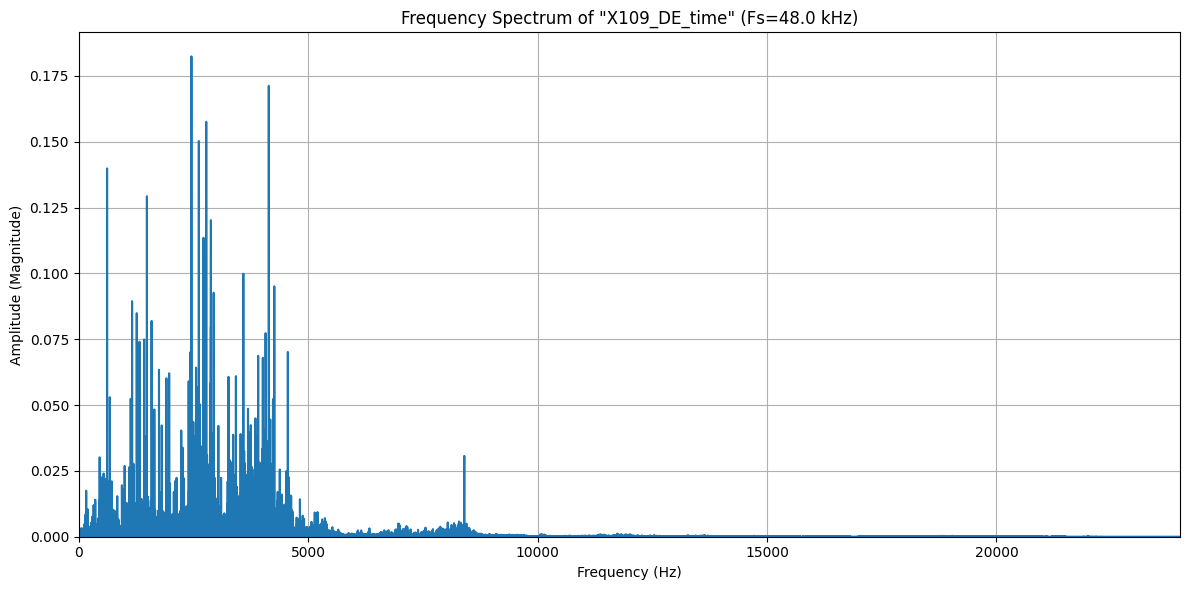

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- Ensure 'selected_vibration_signal' and 'actual_signal_key' are available ---
# Example:
# import scipy.io
# file_path = '/content/sample_data/109.mat'
# mat_contents = scipy.io.loadmat(file_path)
# actual_signal_key = 'X109_DE_time'
# selected_vibration_signal = mat_contents[actual_signal_key]
# Fs = 48000.0 # Hz
# --- End of example ---

def plot_frequency_spectrum(signal, fs, signal_name="Signal"):
    """
    Calculates and plots the frequency spectrum of a time-domain signal.

    Args:
        signal (np.ndarray): The input time-domain signal (1D array).
        fs (float): The sampling frequency of the signal in Hz.
        signal_name (str, optional): Name of the signal for the plot title.
                                     Defaults to "Signal".
    """
    signal = signal.flatten() # Ensure the signal is a 1D array
    N = len(signal) # Number of samples

    if N == 0:
        print("Error: Input signal is empty.")
        return

    # 1. Calculate the Fast Fourier Transform (FFT)
    # The output of fft is complex.
    fft_values = np.fft.fft(signal)

    # 2. Calculate the corresponding frequencies
    # fftfreq generates frequency bins: 0, 1/dt, 2/dt, ..., (N/2-1)/dt, -N/2/dt, ..., -1/dt
    # where dt = N*T (T = 1/fs)
    # More simply, frequencies from 0 up to fs.
    frequencies = np.fft.fftfreq(N, d=1/fs)

    # 3. Calculate the magnitude (amplitude) of the FFT components
    # We are interested in the magnitude, so we take the absolute value.
    # Normalize by N to get the actual amplitude (optional, but common for one-sided spectrum)
    # For a one-sided spectrum, multiply by 2 (except for DC and Nyquist)
    fft_magnitude = np.abs(fft_values) / N

    # 4. We only need to plot the positive frequencies (up to Nyquist frequency, Fs/2)
    # because the FFT of a real signal is symmetric.
    positive_freq_indices = np.where(frequencies >= 0)
    frequencies_positive = frequencies[positive_freq_indices]
    fft_magnitude_positive = fft_magnitude[positive_freq_indices]

    # For the one-sided spectrum, amplitudes of non-DC/Nyquist components are doubled
    # (as we're discarding the negative frequency part that holds half the energy)
    # DC component (0 Hz) and Nyquist component (Fs/2 Hz, if N is even) should not be doubled.
    if len(fft_magnitude_positive) > 1: # Check if there's more than just DC
        # Double the amplitude for non-DC components
        fft_magnitude_positive[1:] *= 2
        # If N is even, the Nyquist frequency component (if present in positive_freq_indices)
        # is unique and should also not be doubled from its (abs/N) value.
        # However, often it's just easier to double all non-DC positive frequencies.
        # For practical purposes, this scaling primarily helps compare amplitudes
        # to original signal components.

    # 5. Plot the frequency spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies_positive, fft_magnitude_positive)

    title_str = f'Frequency Spectrum of "{signal_name}" (Fs={fs/1000} kHz)'
    xlabel_str = 'Frequency (Hz)'
    ylabel_str = 'Amplitude (Magnitude)'

    plt.title(title_str)
    plt.xlabel(xlabel_str)
    plt.ylabel(ylabel_str)
    plt.grid(True)
    # Optionally, limit x-axis to Nyquist frequency if fftfreq goes beyond due to N odd/even details
    plt.xlim(0, fs / 2)
    plt.ylim(bottom=0) # Ensure y-axis starts at 0
    plt.tight_layout()
    plt.show()

# --- Using the function ---
# Make sure 'selected_vibration_signal' and 'actual_signal_key' are defined
# from your previous steps, and set the correct sampling frequency.

if 'selected_vibration_signal' in locals() and 'actual_signal_key' in locals():
    Fs_signal = 48000.0  # Sampling frequency in Hz (48 kHz)
    plot_frequency_spectrum(selected_vibration_signal, Fs_signal, actual_signal_key)
else:
    print("Error: 'selected_vibration_signal' or 'actual_signal_key' is not defined.")
    print("Please ensure your signal data is loaded and these variables are set.")
    # Example with dummy data if signal is not loaded:
    # print("Demonstrating with dummy data...")
    # Fs_dummy = 48000
    # t_dummy = np.arange(0, 0.5, 1/Fs_dummy) # 0.5 seconds of data
    # dummy_signal_data = (1.0 * np.sin(2 * np.pi * 100 * t_dummy) +   # 100 Hz component
    #                      0.5 * np.sin(2 * np.pi * 500 * t_dummy) +   # 500 Hz component
    #                      0.2 * np.random.randn(len(t_dummy)))       # Some noise
    # plot_frequency_spectrum(dummy_signal_data, Fs_dummy, "Dummy Test Signal")

#**_3-1-3-2_Determining the Dominant Frequency 🔊**

In [16]:
import numpy as np

# --- اطمینان از وجود متغیرهای لازم ---
# این متغیرها باید از مراحل قبلی اجرای کد شما در دسترس باشند.
# به عنوان مثال:
# import scipy.io
# file_path = '/content/sample_data/109.mat' # یا مسیر فایل شما
# mat_contents = scipy.io.loadmat(file_path)
# actual_signal_key = 'X109_DE_time'
# selected_vibration_signal = mat_contents[actual_signal_key]
# Fs_signal = 48000.0  # هرتز
# --- پایان بخش مثال ---

# بررسی وجود متغیرهای لازم
if 'selected_vibration_signal' not in locals() or 'Fs_signal' not in locals():
    print("خطا: متغیر 'selected_vibration_signal' یا 'Fs_signal' تعریف نشده است.")
    print("لطفاً ابتدا سیگنال را بارگذاری کرده و فرکانس نمونه‌برداری را مشخص کنید.")
    # در صورت عدم وجود، می‌توان از داده‌های ساختگی برای نمایش استفاده کرد (این بخش را در صورت نیاز فعال کنید)
    # print("ایجاد داده‌های ساختگی برای نمایش...")
    # Fs_signal = 48000.0
    # t_dummy = np.arange(0, 1, 1/Fs_signal) # ۱ ثانیه داده ساختگی
    # # سیگنال ساختگی با فرکانس غالب مثلا ۱۵۰ هرتز
    # selected_vibration_signal = (0.7 * np.sin(2 * np.pi * 150 * t_dummy) +
    #                              0.3 * np.sin(2 * np.pi * 300 * t_dummy) +
    #                              0.5 * np.random.randn(len(t_dummy)))
    # actual_signal_key = "Dummy Signal"
else:
    print(f"در حال محاسبه فرکانس غالب برای سیگنال...")


if 'selected_vibration_signal' in locals() and 'Fs_signal' in locals():
    signal_data = selected_vibration_signal.flatten()
    N = len(signal_data) # تعداد نمونه‌ها

    if N == 0:
        print("خطا: سیگنال ورودی خالی است.")
    else:
        # ۱. محاسبه تبدیل فوریه سریع (FFT)
        fft_values = np.fft.fft(signal_data)

        # ۲. محاسبه دامنه‌های تبدیل فوریه
        # فقط به نیمه مثبت طیف نیاز داریم (چون سیگنال حقیقی است و طیف متقارن است)
        # و از تقسیم بر N برای نرمال‌سازی استفاده می‌کنیم.
        fft_magnitude = np.abs(fft_values[:N//2]) / N # استفاده از N//2 برای نیمه مثبت طیف

        # ۳. محاسبه فرکانس‌های متناظر با هر نقطه از FFT
        # فرکانس‌ها از 0 تا Fs/2 خواهند بود.
        frequencies = np.fft.fftfreq(N, d=1/Fs_signal)[:N//2]

        # ۴. پیدا کردن اندیس مربوط به بیشترین دامنه
        # از جستجو در فرکانس‌های بالاتر از 0Hz شروع می‌کنیم تا از مولفه DC (در صورت وجود قوی) صرف نظر شود،
        # اگرچه برای بسیاری از سیگنال‌های ارتعاشی، فرکانس‌های پایین هم مهم هستند.
        # در اینجا، کل طیف مثبت (شامل DC) را در نظر می‌گیریم.
        if len(fft_magnitude) > 0:
            dominant_freq_index = np.argmax(fft_magnitude)
            dominant_frequency = frequencies[dominant_freq_index]
            max_magnitude = fft_magnitude[dominant_freq_index]

            print(f"\n--- نتیجه محاسبه فرکانس غالب ---")
            print(f"بیشترین دامنه در طیف: {max_magnitude:.4f}")
            print(f"فرکانس غالب (Dominant Frequency): {dominant_frequency:.2f} هرتز")

            # (اختیاری) نمایش چند فرکانس با بیشترین دامنه
            # این بخش برای بررسی بیشتر مفید است
            # num_top_frequencies = 5
            # top_indices = np.argsort(fft_magnitude)[-num_top_frequencies:][::-1] # اندیس‌ها به ترتیب نزولی دامنه
            # print(f"\n{num_top_frequencies} فرکانس برتر:")
            # for i, index in enumerate(top_indices):
            #     print(f"{i+1}. فرکانس: {frequencies[index]:.2f} هرتز, دامنه: {fft_magnitude[index]:.4f}")

        else:
            print("خطا: طیف فرکانسی محاسبه شده خالی است.")
else:
    pass # پیام خطا قبلاً چاپ شده است

در حال محاسبه فرکانس غالب برای سیگنال...

--- نتیجه محاسبه فرکانس غالب ---
بیشترین دامنه در طیف: 0.0912
فرکانس غالب (Dominant Frequency): 2454.72 هرتز
در حال محاسبه فرکانس غالب برای سیگنال...

--- نتیجه محاسبه فرکانس غالب ---
بیشترین دامنه در طیف: 0.0912
فرکانس غالب (Dominant Frequency): 2454.72 هرتز


##

#**_3-1-4-1_**